# Pharmaceuticals for patients with cronic diseases
**Estimation of the atractivness related with the selling of pharmaceuticals for patients with chronic diseases** 
- Author: Rob (GH: Roberto919)
- Date: 3 July 2020

**Key questions that should be adressed**

1) Data analysis - studies results
- [x] 1) How many studies were liberated and how do the results look like?
- [ ] 2) How is age distributed among patients with a study result labeled as 'high'?
- [ ] 3) How is gender distributed among patients with a study result labeled as 'high'?
- [x] 4) How does patient's recurrence looks like within data?
- [ ] 5) How are the exact values of the test distributed?

2) Data Analysis - drug selling
- [ ] 1) If drugs were sold to patients that obtained 'high' in their study, how would revenues look like?

---
---

## Imports

#### Python libraries

In [1]:
import pandas as pd

import pprint as pp

import plotly.figure_factory as ff

from datetime import *

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from statistics import median, mean

import numpy as np

#### Ancillary modules

In [2]:
## Reloading imports
%load_ext autoreload
%autoreload 2

from Pharma_analysis_params import metmorfina_pricing

---

## Data upload

### Hemoglobina glicosilada studies results
- Region: Guadalajara, Mexico
- Time period: Jan - Mar 2017
- Laboratory: Chopo

#### Importing and processing data

In [3]:
df = pd.read_csv('Sources/Resultados Hemoglobina Glicosilada GDL Chopo ENE-MAR17.csv')

## Formatting
df.loc[:, 'DLIBERACION'] = pd.to_datetime(df.loc[:, 'DLIBERACION'], format='%d/%m/%y %H:%M')
df['Week'] = df['DLIBERACION'].apply(lambda x: x.isocalendar()[1])
df['Month'] = df['DLIBERACION'].apply(lambda x: x.month)

In [4]:
df

,ORDEN,KPACIENTE,EDAD,GENERO,DLIBERACION,CEXAMEN,CCODIGOLABORATORIO,STITULOIMPRESION,RESULTADO,MEDIDA,STIPORESULTADO,Week,Month
0,BA406221,10997326,50,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.85,%,NORMAL,1,1
1,BA406231,13945511,30,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.93,%,NORMAL,1,1
2,GH65857,1675951,63,F,2017-01-02 12:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.63,%,NORMAL,1,1
3,HR2682,10542199,47,M,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.59,%,NORMAL,1,1
4,HQ53060,10430488,46,F,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.67,%,NORMAL,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,BA416105,14243008,25,M,2017-03-31 18:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),14.10,%,ALTO,13,3
3402,JS2920,11549888,39,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),13.90,%,ALTO,13,3
3403,BL34420,10579210,37,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),7.70,%,ALTO,13,3
3404,JR3555,14241435,84,M,2017-03-31 18:57:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.20,%,ALTO,13,3


#### Summary of key observations in the data

##### Procedure

In [5]:
## Total patients
t_pats = df.shape[0]

## Unique patients
u_pats = len(df['KPACIENTE'].unique())

## Range of dates in data
min_date = min(df['DLIBERACION'])
max_date = max(df['DLIBERACION'])

## Number of weeks in study
max_week_count = max(df['Week'])

In [6]:
text = """
Summary of key observations in data: \n
    - Total number of patients: {}
    - Number of unique patients: {}
    - Range of dates covered: {} - {}
    - Number of weeks covered: {}
""".format(t_pats, u_pats, min_date, max_date, max_week_count)

##### Resulting summary

In [7]:
print(text)


Summary of key observations in data: 

    - Total number of patients: 3406
    - Number of unique patients: 3304
    - Range of dates covered: 2017-01-02 11:47:00 - 2017-03-31 19:17:00
    - Number of weeks covered: 13



---

## Data analysis - studies results

### 1) How many studies were liberated and how do the results look like?

#### Procedure

In [192]:
dfx = df.copy()
dfx.drop_duplicates(['KPACIENTE'], keep='first', inplace=True)

In [193]:
dfx = df.loc[:, ['Week', 'STIPORESULTADO', 'ORDEN']].groupby(['Week', 'STIPORESULTADO']).count().unstack()

dfx = dfx.droplevel('STIPORESULTADO', axis=1)

dfx.columns = ['Alto', 'Normal']

In [194]:
dfx

,Alto,Normal
Week,,
1,140,110
2,162,117
3,162,125
4,138,116
5,146,108
6,153,97
7,149,110
8,182,114
9,168,118


#### Result

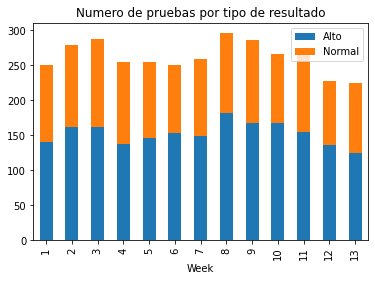

In [195]:
dfx.plot(kind='bar', 
         stacked=True, 
         title='Numero de pruebas por tipo de resultado'
        )

In [198]:
dfx['Part_alto'] = dfx.apply(lambda x: x['Alto']/(x['Alto'] + x['Normal']), axis=1)

In [200]:
mean(list(dfx['Part_alto']))

0.5811359326929046

### 2) How is age distributed among patients with a study result labeled as 'high'?

#### Procedure

In [137]:
dfx = df.copy()
dfx.drop_duplicates(['KPACIENTE'], keep='first', inplace=True)

In [138]:
dfx

,ORDEN,KPACIENTE,EDAD,GENERO,DLIBERACION,CEXAMEN,CCODIGOLABORATORIO,STITULOIMPRESION,RESULTADO,MEDIDA,STIPORESULTADO,Week,Month
0,BA406221,10997326,50,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.85,%,NORMAL,1,1
1,BA406231,13945511,30,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.93,%,NORMAL,1,1
2,GH65857,1675951,63,F,2017-01-02 12:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.63,%,NORMAL,1,1
3,HR2682,10542199,47,M,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.59,%,NORMAL,1,1
4,HQ53060,10430488,46,F,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.67,%,NORMAL,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,BA416105,14243008,25,M,2017-03-31 18:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),14.10,%,ALTO,13,3
3402,JS2920,11549888,39,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),13.90,%,ALTO,13,3
3403,BL34420,10579210,37,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),7.70,%,ALTO,13,3
3404,JR3555,14241435,84,M,2017-03-31 18:57:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.20,%,ALTO,13,3


#### Simple histogram

In [139]:
rc = [
    'ORDEN',
    'EDAD'
]

dfx = dfx.loc[:, rc]

In [140]:
dfx

,ORDEN,EDAD
0,BA406221,50
1,BA406231,30
2,GH65857,63
3,HR2682,47
4,HQ53060,46
...,...,...
3401,BA416105,25
3402,JS2920,39
3403,BL34420,37
3404,JR3555,84


#### Result

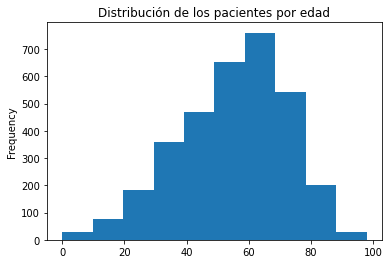

In [142]:
dfx['EDAD'].plot(kind='hist', 
                 stacked=True,
                 title='Distribución de los pacientes por edad'
                )

#### Stacked histogram

In [ ]:
rc = [
    'ORDEN',
    'EDAD',
    'STIPORESULTADO'
]

dfx = dfx.loc[:, rc]

In [ ]:
dfx = dfx.groupby(['EDAD', 'STIPORESULTADO']).count().unstack()
dfx.fillna(0, inplace=True)

dfx

In [ ]:
n_bins = 10

fig, axes = plt.subplots(nrows=1, ncols=1)

axes.hist(dfx, n_bins, density=True, histtype='bar', stacked=True)
axes.set_title('stacked bar')

In [ ]:
dfx.plot(kind='hist', stacked=True)

In [ ]:
dfx['EDAD'].describe()

### 3) How is gender distributed among patients with a study result labeled as 'high'?

Considered not crucial

### 4) How does patient's recurrence looks like within data?

#### Procedure 1 - *Counting patient's recurrence (General)*

In [143]:
dfx = pd.DataFrame(df['KPACIENTE'].value_counts().value_counts())
dfx.index.name = 'Recurrence'

In [144]:
pats = dfx['KPACIENTE'].sum()

dfx['Participación'] = dfx['KPACIENTE'].apply(lambda x: x/pats)

#### Result 1 - *Counting patient's recurrence (General)*

In [145]:
dfx

,KPACIENTE,Participación
Recurrence,,
1,3208,0.970944
2,91,0.027542
3,4,0.001211
4,1,0.000303


#### Procedure 2 - *Counting patient's recurrence (Segmented)*

In [146]:
dfxy = df.copy()
dfxy.set_index('KPACIENTE', drop=True, inplace=True)
dfxy

,ORDEN,EDAD,GENERO,DLIBERACION,CEXAMEN,CCODIGOLABORATORIO,STITULOIMPRESION,RESULTADO,MEDIDA,STIPORESULTADO,Week,Month
KPACIENTE,,,,,,,,,,,,
10997326,BA406221,50,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.85,%,NORMAL,1,1
13945511,BA406231,30,F,2017-01-02 11:47:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.93,%,NORMAL,1,1
1675951,GH65857,63,F,2017-01-02 12:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.63,%,NORMAL,1,1
10542199,HR2682,47,M,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.59,%,NORMAL,1,1
10430488,HQ53060,46,F,2017-01-02 12:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.67,%,NORMAL,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14243008,BA416105,25,M,2017-03-31 18:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),14.10,%,ALTO,13,3
11549888,JS2920,39,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),13.90,%,ALTO,13,3
10579210,BL34420,37,M,2017-03-31 18:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),7.70,%,ALTO,13,3


In [147]:
recurring_pats = pd.DataFrame(df['KPACIENTE'].value_counts())
recurring_pats.rename(columns={'KPACIENTE': 'Recurrence_ct'}, inplace=True)
recurring_pats

,Recurrence_ct
2230054,4
13017357,3
2270751,3
12850796,3
3877002,3
...,...
14161296,1
14073229,1
14230417,1
2770314,1


In [148]:
dfxy = dfxy.join(recurring_pats)

In [149]:
dfxy['First_diagnostic'] = 'Not_assigned'

In [150]:
m1 = recurring_pats['Recurrence_ct'] > 1

recurring_pats_plus_1 = list(recurring_pats.loc[m1, :].index.unique())

In [151]:
def assigning_first_diagnostic(rec_pat_p1):

    rc = [
        'DLIBERACION',
        'Recurrence_ct',
        'STIPORESULTADO',
        'First_diagnostic'
    ]


    ## Filtering for a specific patient
    m1 = (dfxy.index == rec_pat_p1) 


    ## Determining the first diagnosis provided to the client
    m2 = dfxy['DLIBERACION'] == min(dfxy.loc[m1, 'DLIBERACION'])
    first_diagnostic = list(dfxy.loc[(m1 & m2), 'STIPORESULTADO'])[0]
    first_diagnostic


    ## Assigning the first diagnostic value obtained to all the client's visits
    dfxy.loc[m1, 'First_diagnostic'] = first_diagnostic

In [152]:
## Assigning first diagnostic for patients with more than one visit
for rec_pat_p1 in recurring_pats_plus_1:
    assigning_first_diagnostic(rec_pat_p1)

In [153]:
## Assigning diagnostic for patients with one visit
m1 = dfxy['Recurrence_ct'] == 1
dfxy.loc[m1, 'First_diagnostic'] = dfxy.loc[m1, 'STIPORESULTADO']

In [154]:
dfxy

,ORDEN,EDAD,GENERO,DLIBERACION,CEXAMEN,CCODIGOLABORATORIO,STITULOIMPRESION,RESULTADO,MEDIDA,STIPORESULTADO,Week,Month,Recurrence_ct,First_diagnostic
47338,GH70370,65,F,2017-03-12 14:17:00,"16,025",7333,Hemoglobina glicosilada (A1c),7.90,%,ALTO,10,3,1,ALTO
110721,BA415904,48,M,2017-03-30 12:57:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.77,%,NORMAL,13,3,1,NORMAL
132414,BA413855,63,M,2017-03-11 11:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.37,%,NORMAL,10,3,1,NORMAL
197856,BK72722,29,F,2017-03-14 17:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.65,%,NORMAL,11,3,1,NORMAL
237414,BA414336,68,M,2017-03-15 16:27:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.70,%,ALTO,11,3,1,ALTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241421,BA416072,58,F,2017-03-31 14:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.30,%,ALTO,13,3,1,ALTO
14241435,JR3555,84,M,2017-03-31 18:57:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.20,%,ALTO,13,3,1,ALTO
14242155,GH71577,59,F,2017-03-31 14:37:00,"16,025",7333,Hemoglobina glicosilada (A1c),5.77,%,NORMAL,13,3,1,NORMAL
14242180,GH71578,57,F,2017-03-31 18:07:00,"16,025",7333,Hemoglobina glicosilada (A1c),6.30,%,ALTO,13,3,1,ALTO


In [158]:
dfxy['CodClte'] = dfxy.index

In [159]:
rc = [
    'Recurrence_ct',
    'First_diagnostic',
    'CodClte'
]

dfxy = dfxy.loc[:, rc]
dfxy

,Recurrence_ct,First_diagnostic,CodClte
47338,1,ALTO,47338
110721,1,NORMAL,110721
132414,1,NORMAL,132414
197856,1,NORMAL,197856
237414,1,ALTO,237414
...,...,...,...
14241421,1,ALTO,14241421
14241435,1,ALTO,14241435
14242155,1,NORMAL,14242155
14242180,1,ALTO,14242180


#### Result 2 - *Counting patient's recurrence (Segmented)*

In [160]:
pd.DataFrame(dfxy.groupby(['First_diagnostic', 'Recurrence_ct'])['CodClte'].nunique())

CodClte
First_diagnostic Recurrence_ct         
ALTO             1                 1826
                 2                   72
                 3                    4
                 4                    1
NORMAL           1                 1382
                 2                   19

## Data Analysis - drug selling

### Drug price definition

#### Procedure

In [167]:
drug_prices_list = [metmorfina_pricing[brand]['p1_a'] for brand in metmorfina_pricing]
drug_prices_list

[50, 79.0, 52.25]

#### Result

In [168]:
drug_price = mean(drug_prices_list)
drug_price

60.416666666666664

### Calculating revenues related to the selling of the drug - monthly basis

#### Procedure

In [186]:
dfx = df.copy()

dfx.drop_duplicates(['KPACIENTE'], keep='first', inplace=True)

rc = [
    'Week'
]

m1 = dfx['STIPORESULTADO'] == 'ALTO'

dfx = dfx.loc[m1, rc]

dfx['Drug_income'] = drug_price

In [187]:
dfx

,Week,Drug_income
10,1,60.416667
15,1,60.416667
16,1,60.416667
17,1,60.416667
18,1,60.416667
...,...,...
3401,13,60.416667
3402,13,60.416667
3403,13,60.416667
3404,13,60.416667


In [189]:
dfx = dfx.groupby(['Week']).count()

In [191]:
mean(list(dfx['Drug_income']))

146.3846153846154

In [176]:
dfx = dfx.groupby(['Month']).sum()

In [177]:
dfx

,Drug_income
Month,
1,39572.916667
2,36491.666667
3,38908.333333


In [178]:
def money(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fK' % (x*1e-3)

#### Result

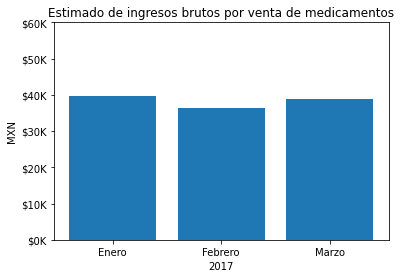

In [179]:
## Creating figure
fig, ax = plt.subplots()
formatter = FuncFormatter(money)


## Plotting data
plt.bar(
    dfx.index, dfx['Drug_income'],
)


## Formatting axis
plt.xticks([1, 2, 3], ('Enero', 'Febrero', 'Marzo'))
plt.xlabel('2017')
ax.yaxis.set_major_formatter(formatter)
plt.yticks(range(0, 70000, 10000))
plt.ylabel('MXN')


## Additional formatting
plt.title('Estimado de ingresos brutos por venta de medicamentos')


plt.show()

In [180]:
dfx

,Drug_income
Month,
1,39572.916667
2,36491.666667
3,38908.333333


---
---